sales data analysis


In [1]:
# --- Setup ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Show all columns in DataFrame previews
pd.set_option("display.max_columns", None)


Load the CSV


In [6]:
# Path to your CSV (change this to your own file path if needed)
csv_path = "sales_sample_data.csv"  # e.g., 'drive/MyDrive/sales.csv' in Colab
df = pd.read_csv(csv_path, parse_dates=["order_date"])
df.head()

,order_date,region,product,customer_id,unit_price,quantity,revenue
0,2024-06-12,North,Phone,1095,30795,1,30795
1,2024-03-11,South,Laptop,1018,126820,3,380460
2,2024-01-27,North,Tablet,1076,26265,3,78795
3,2024-04-18,North,Phone,1012,36962,4,147848
4,2024-02-25,North,Laptop,1072,94131,4,376524


look at basic info, missing values, and basic stats.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   order_date   500 non-null    datetime64[ns]
 1   region       500 non-null    object        
 2   product      500 non-null    object        
 3   customer_id  500 non-null    int64         
 4   unit_price   500 non-null    int64         
 5   quantity     500 non-null    int64         
 6   revenue      500 non-null    int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 27.5+ KB


In [8]:
df.isna().sum()

order_date     0
region         0
product        0
customer_id    0
unit_price     0
quantity       0
revenue        0
dtype: int64

In [9]:
df.describe(include="all")

,order_date,region,product,customer_id,unit_price,quantity,revenue
count,500,500,500,500.000000,500.000000,500.000000,500.000000
unique,NaN,4,5,NaN,NaN,NaN,NaN
top,NaN,North,Headphones,NaN,NaN,NaN,NaN
freq,NaN,126,120,NaN,NaN,NaN,NaN
mean,2024-04-02 14:21:07.199999744,NaN,NaN,1060.412000,34032.200000,2.514000,85853.444000
min,2024-01-01 00:00:00,NaN,NaN,1001.000000,521.000000,1.000000,521.000000
25%,2024-02-18 00:00:00,NaN,NaN,1031.750000,3303.750000,1.000000,8200.250000
50%,2024-04-06 12:00:00,NaN,NaN,1060.000000,21960.000000,3.000000,46215.500000
75%,2024-05-18 00:00:00,NaN,NaN,1088.250000,56496.500000,4.000000,128072.250000
max,2024-06-30 00:00:00,NaN,NaN,1120.000000,129909.000000,4.000000,515812.000000


Clean & Transform

In [10]:
df["order_date"] = pd.to_datetime(df["order_date"], errors="coerce")

if "revenue" not in df.columns:
    df["revenue"] = df["unit_price"] * df["quantity"]

df = df.dropna(subset=["order_date"])
df.head()

,order_date,region,product,customer_id,unit_price,quantity,revenue
0,2024-06-12,North,Phone,1095,30795,1,30795
1,2024-03-11,South,Laptop,1018,126820,3,380460
2,2024-01-27,North,Tablet,1076,26265,3,78795
3,2024-04-18,North,Phone,1012,36962,4,147848
4,2024-02-25,North,Laptop,1072,94131,4,376524


compute quick metrics such as total revenue, number of orders, and average order value.

In [11]:
total_revenue = df["revenue"].sum()
num_orders = len(df)
avg_order_value = df["revenue"].mean()

print("Total Revenue:", total_revenue)
print("Number of Orders:", num_orders)
print("Average Order Value:", round(avg_order_value, 2))

Total Revenue: 42926722
Number of Orders: 500
Average Order Value: 85853.44


Revenue by Product

In [12]:
by_product = (
    df.groupby("product")[["quantity", "revenue"]]
      .sum()
      .sort_values("revenue", ascending=False)
)
by_product

,quantity,revenue
product,,
Laptop,239,21248830
Tablet,240,12105373
Phone,248,7311962
Headphones,296,1863848
Charger,234,396709


Revenue by Region

In [13]:
by_region = (
    df.groupby("region")[["quantity", "revenue"]]
      .sum()
      .sort_values("revenue", ascending=False)
)
by_region

,quantity,revenue
region,,
North,347,12039163
West,318,11361802
South,313,10496678
East,279,9029079


Monthly Revenue Trend

In [14]:
monthly_rev = (
    df.set_index("order_date")
      .resample("M")["revenue"]
      .sum()
)
monthly_rev

C:\Users\parul\AppData\Local\Temp\ipykernel_7296\2660832631.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample("M")["revenue"]


order_date
2024-01-31    6624726
2024-02-29    5209169
2024-03-31    9010401
2024-04-30    8926586
2024-05-31    7127659
2024-06-30    6028181
Freq: ME, Name: revenue, dtype: int64

Charts (Matplotlib)
One plot per chart, using Matplotlib only.

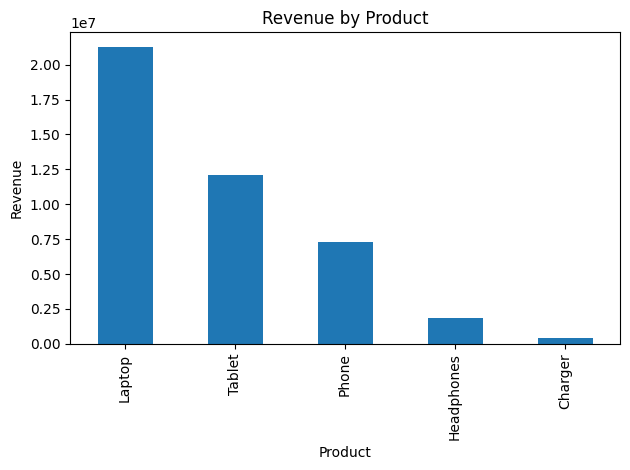

In [15]:
# Bar: Revenue by Product
plt.figure()
by_product["revenue"].plot(kind="bar")
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()

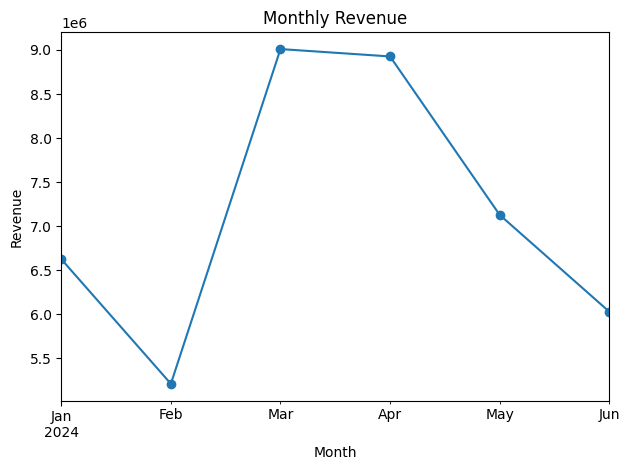

In [16]:
# Line: Monthly Revenue Trend
plt.figure()
monthly_rev.plot(kind="line", marker="o")
plt.title("Monthly Revenue")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()

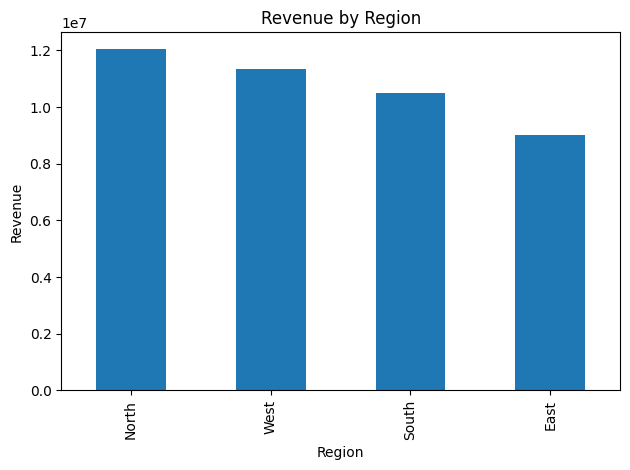

In [17]:
# Bar: Revenue by Region
plt.figure()
by_region["revenue"].plot(kind="bar")
plt.title("Revenue by Region")
plt.xlabel("Region")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()

Save summary tables and charts.

Files saved: by_product.csv, by_region.csv, monthly_revenue.csv, revenue_by_product.png, monthly_revenue.png, revenue_by_region.png


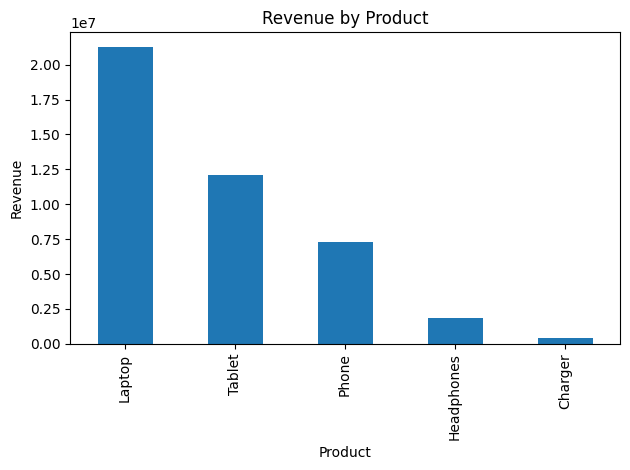

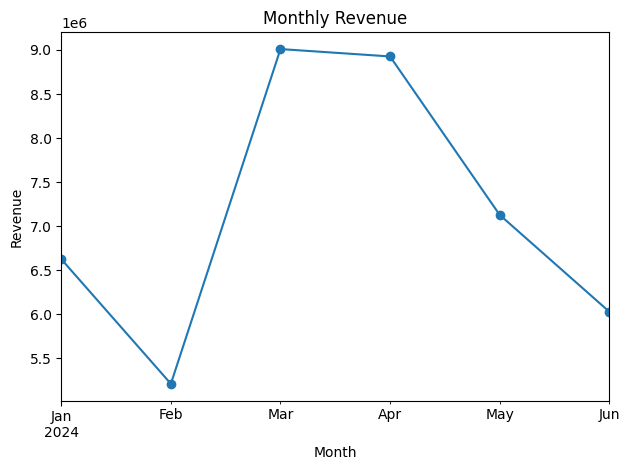

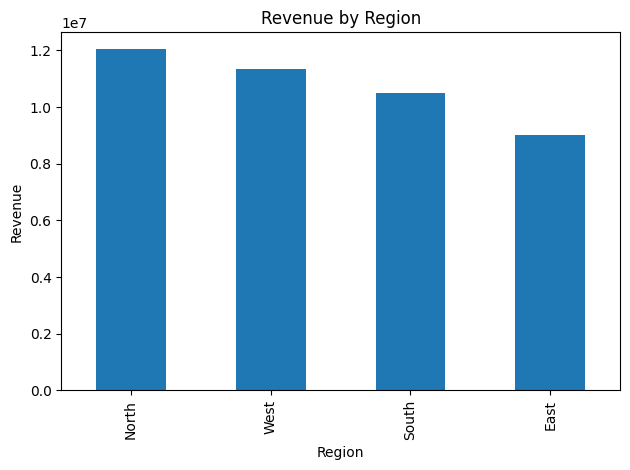

In [18]:
# Save tables
by_product.to_csv("by_product.csv")
by_region.to_csv("by_region.csv")
monthly_rev.to_csv("monthly_revenue.csv")

# Save charts
plt.figure()
by_product["revenue"].plot(kind="bar")
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.tight_layout()
plt.savefig("revenue_by_product.png")

plt.figure()
monthly_rev.plot(kind="line", marker="o")
plt.title("Monthly Revenue")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.tight_layout()
plt.savefig("monthly_revenue.png")

plt.figure()
by_region["revenue"].plot(kind="bar")
plt.title("Revenue by Region")
plt.xlabel("Region")
plt.ylabel("Revenue")
plt.tight_layout()
plt.savefig("revenue_by_region.png")

print("Files saved: by_product.csv, by_region.csv, monthly_revenue.csv, revenue_by_product.png, monthly_revenue.png, revenue_by_region.png")